#PRINCIPLES OF MACHINE LEARNING 
##Evaluation 1 


1. Download Heart Disease dataset from kaggle repository. Read the description of the dataset to
understand the nature of the dataset. Link : https://www.kaggle.com/ronitf/heart-disease-uci
(Description about the dataset can be found from following link : https://archive.ics.uci.edu/ml/
datasets/Heart+Disease)

Importing libraries

In [39]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import random 
import seaborn as sns

Reading the csv

In [168]:
df = pd.read_csv('/content/drive/MyDrive/6th SEM/POML/heart.csv')

Displaying first few rows of the Dataframe

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Gives the description of the dataframe

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##2. Verify that the given dataset has any missing values or not. 
If all the cells are filled with values
then randomly delete some cells values. Hence the resultant dataset will have some missing
values.

In [169]:
for i in df.columns:
  if(df[i].isnull().sum() == 0):
    roww = random.randrange(0,len(df))
    col = df.columns.get_loc(i)
    df.iloc[roww,col]=np.nan
df.isnull().sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64

##3. Fill the missing values with the mean (or) mode (or) median (or) most frequently occurred value (or) random value in the range [mean-std, mean +std].

In [200]:
for i in df.columns:
  if i not in ("age","trestbps","chol","thalach"):
    df[i].fillna(df[i].mode()[0], inplace = True)
     
  else:
    df[i].fillna(df[i].mean(), inplace = True) 

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##4nd Compute the following statistics of all the features:
i) Mean
ii) Median
iii) Mode
iv) Range
v) Inter quartile Range
vi) Standard Deviation

**Mean**

In [7]:
df.mean()

age          54.374172
sex           0.682119
cp            0.970199
trestbps    131.579470
chol        246.317881
fbs           0.149007
restecg       0.526490
thalach     149.821192
exang         0.327815
oldpeak       1.037748
slope         1.400662
ca            0.731788
thal          2.314570
target        0.546358
dtype: float64

**Median**

In [8]:
df.median(axis=0)

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

**Mode**

In [9]:
df.mode()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Range**


In [10]:
df.max()-df.min()

age          48.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

**InterQuartile Range**


In [11]:
Q3 = df.quantile(0.75)
Q1 = df.quantile(0.25)
Q3-Q1

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     31.0
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

**Standard Deviation**

In [12]:
t = df.std()
print(t)

age          9.081077
sex          0.465653
cp           1.030546
trestbps    17.521188
chol        51.822273
fbs          0.356095
restecg      0.525156
thalach     22.703265
exang        0.469417
oldpeak      1.160626
slope        0.615796
ca           1.021742
thal         0.612010
target       0.497846
dtype: float64


##5.Partition the given dataset into mutually exclusive and exhaustive subsets of records based on the class labels
. There will be a dedicated partition for a class label. If the data set has class labels
‘short’, ‘medium’, and ‘tall’ then 3 partitions will be created ‘ , ’
respectively.



In [197]:
new_df=df.groupby('target')
hd=new_df.get_group(1)
no_hd=new_df.get_group(0)

print("No Heart Disease")
no_hd.head()

No Heart Disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67.000000,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,0.0
166,67.000000,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,3.0,0.0
167,62.000000,0.0,0.0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,2.0,0.0
168,54.337748,1.0,0.0,130.0,254.0,0.0,0.0,147.0,0.0,1.4,1.0,1.0,3.0,0.0
169,53.000000,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0


##6.Compute the following statistics of all the features of all the partitions created in step-5:
i) Mean
ii) Median
iii) Mode
iv) Range
v) Inter quartile Range
vi) Standard Deviation

In [103]:
FBL = hd

**Mean**

In [104]:
FBL.mean()

age          56.652366
sex           0.824818
cp            0.488834
trestbps    134.347295
chol        251.549766
fbs           0.154372
restecg       0.445255
thalach     139.363658
exang         0.547445
oldpeak       1.585677
slope         1.170808
ca            1.175182
thal          2.562044
target        0.000000
dtype: float64

**Median**

In [105]:
FBL.median(axis=0)

age          58.0
sex           1.0
cp            0.0
trestbps    130.0
chol        249.0
fbs           0.0
restecg       0.0
thalach     142.0
exang         1.0
oldpeak       1.4
slope         1.0
ca            1.0
thal          3.0
target        0.0
dtype: float64

**Mode**

In [106]:
FBL.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,140.0,212.0,0.0,0.0,132.0,1.0,0.0,1.0,0.0,3.0,0.0
1,NaN,NaN,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Range**


In [107]:
FBL.max()-FBL.min()

age          42.0
sex           1.0
cp            3.0
trestbps    100.0
chol        278.0
fbs           1.0
restecg       2.0
thalach     124.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          2.0
target        0.0
dtype: float64

**InterQuartile Range**


In [108]:
Q3 = FBL.quantile(0.75)
Q1 = FBL.quantile(0.25)
Q3-Q1

age          9.000000
sex          0.000000
cp           0.970199
trestbps    24.000000
chol        65.000000
fbs          0.000000
restecg      1.000000
thalach     31.000000
exang        1.000000
oldpeak      1.900000
slope        1.000000
ca           2.000000
thal         1.000000
target       0.000000
dtype: float64

**Standard Deviation**

In [109]:
t = FBL.std()
print(t)

age          7.973918
sex          0.381518
cp           0.908311
trestbps    18.770153
chol        49.438057
fbs          0.361343
restecg      0.541236
thalach     22.362978
exang        0.499570
oldpeak      1.304990
slope        0.563364
ca           1.042465
thal         0.651484
target       0.000000
dtype: float64


##6.Compute the following statistics of all the features of all the partitions created in step-5:
i) Mean
ii) Median
iii) Mode
iv) Range
v) Inter quartile Range
vi) Standard Deviation

In [96]:
FBL = no_hd

**Mean**

In [97]:
FBL.mean()

age          52.496970
sex           0.561710
cp            1.375758
trestbps    129.303030
chol        242.230303
fbs           0.139394
restecg       0.591070
thalach     158.466667
exang         0.141381
oldpeak       0.583030
slope         1.593939
ca            0.368071
thal          2.123119
target        1.000000
dtype: float64

**Median**

In [98]:
FBL.median(axis=0)

age          52.0
sex           1.0
cp            2.0
trestbps    130.0
chol        234.0
fbs           0.0
restecg       1.0
thalach     161.0
exang         0.0
oldpeak       0.2
slope         2.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

**Mode**

In [99]:
FBL.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,54.0,1.0,2.0,120.0,197.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,130.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Range**


In [100]:
FBL.max()-FBL.min()

age          47.0
sex           1.0
cp            3.0
trestbps     86.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     106.0
exang         1.0
oldpeak       4.2
slope         2.0
ca            4.0
thal          3.0
target        0.0
dtype: float64

**InterQuartile Range**


In [210]:
Q3 = FBL.quantile(0.75)
Q1 = FBL.quantile(0.25)
Q3-Q1

age          9.000000
sex          0.000000
cp           0.970199
trestbps    24.000000
chol        65.000000
fbs          0.000000
restecg      1.000000
thalach     31.000000
exang        1.000000
oldpeak      1.900000
slope        1.000000
ca           2.000000
thal         1.000000
target       0.000000
dtype: float64

**Standard Deviation**

In [102]:
t = FBL.std()
print(t)

age          9.550651
sex          0.496358
cp           0.952222
trestbps    16.169613
chol        53.552872
fbs          0.347412
restecg      0.503840
thalach     19.174276
exang        0.347547
oldpeak      0.780683
slope        0.593635
ca           0.848894
thal         0.465897
target       0.000000
dtype: float64


##7. Give your comments or inference by comparing the statistics obtained in step-4 and 6

Inferences Obtained by comparing the statistics obtained by dividing the Dataset into Heart disease patients and Healthy patients

*   Chances of heart disease increases with Cholestrol level .
*   Having maximum heart rate achieved increases , More chances of being prone to Heart Diseases
*   As ST depression induced by exercise relative to rest decreases the Heart 
disease Rate increases
 






##8 & 9. Construct a line plots (use the dataset read in step-1) and 9.Use appropriate X axis, y axis labels, title, and Legend (bottom right) for the graph generated.
for Age Vs cp: chest pain type, cp: chest
pain type vs chol: serum cholestoral, Age vs thal, and sex vs cp: chest pain type attributes using
the plot style ‘ggplot’.

###AGE VS Chest pain type

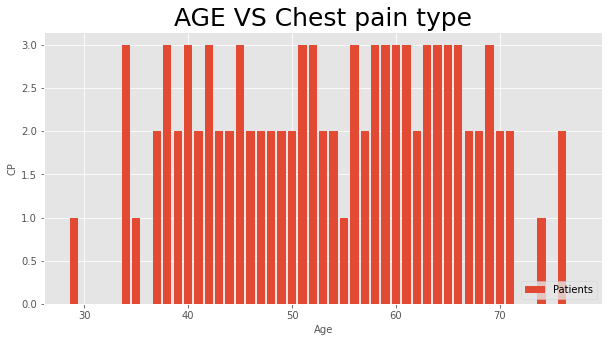

In [237]:
plt.figure(figsize=(10,5))
plt.title("AGE VS Chest pain type",fontsize=25)
plt.style.use('ggplot')
plt.xlabel("Age",fontsize=10)
plt.ylabel("CP",fontsize=10)
ko = df.sort_values(by=['age'])
plt.bar(ko.age,ko.cp,label='Patients')
plt.legend(loc='lower right')
plt.show()


`Plotting datas of Patients with Heart disease and Healthy`

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


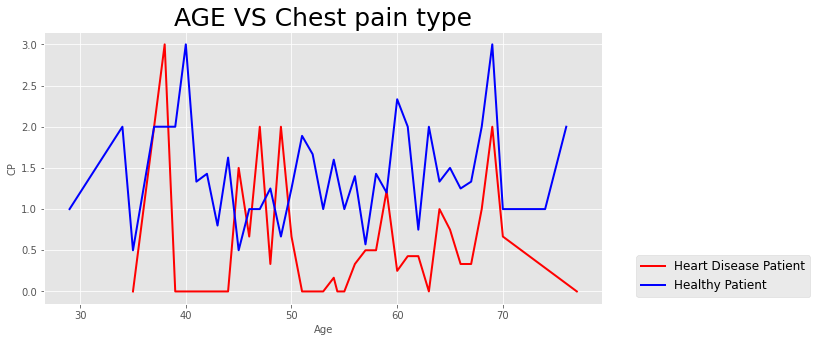

In [205]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df["age"],df["cp"],linewidth=2,hue = df['target'],ci = None,palette=['red','blue'])
plt.xlabel("Age",fontsize=10)
plt.ylabel("CP",fontsize=10)
plt.title("AGE VS Chest pain type",fontsize=25)
plt.legend(labels=['Heart Disease Patient','Healthy Patient'],frameon=True,fontsize='large',bbox_to_anchor=(1.05,0.2),loc=2)
plt.show()

###Chest pain type vs Serum cholestoral

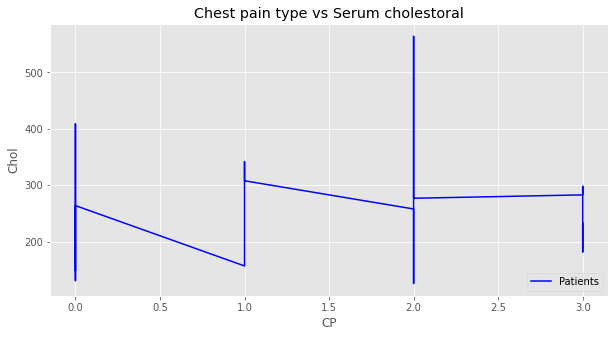

In [192]:
plt.figure(figsize=(10,5))
plt.title("Chest pain type vs Serum cholestoral")
plt.style.use('ggplot')
plt.xlabel("CP")
plt.ylabel("Chol")
ko = df.sort_values(by=['cp'])
plt.plot(ko.cp,ko.chol,'b',label='Patients')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


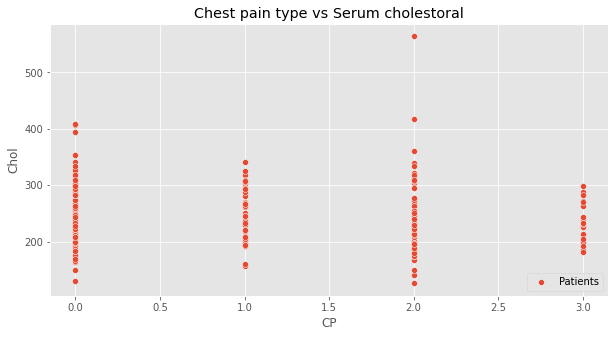

In [201]:
plt.figure(figsize=(10,5))
plt.title("Chest pain type vs Serum cholestoral")
plt.style.use('ggplot')
plt.xlabel("CP")
plt.ylabel("Chol")
ko = df.sort_values(by=['cp'])
sns.scatterplot(ko.cp,ko.chol,label='Patients')

plt.legend(loc='lower right')
plt.show()

`Plotting datas of Patients with Heart disease and Healthy`

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


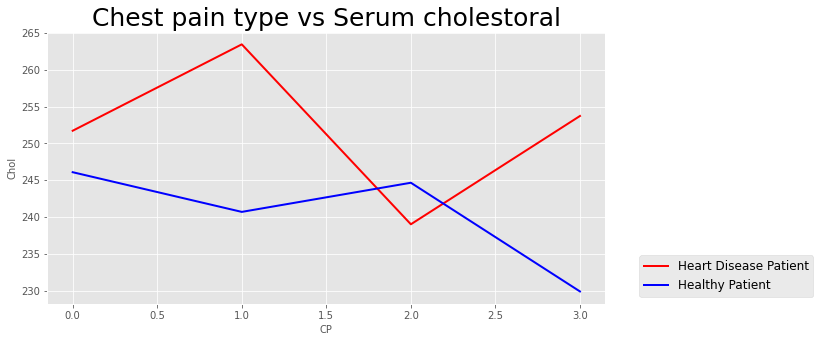

In [182]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df["cp"],df["chol"],linewidth=2,hue = df['target'],ci=None,palette=['red','blue'])
plt.xlabel("CP",fontsize=10)
plt.ylabel("Chol",fontsize=10)
plt.title("Chest pain type vs Serum cholestoral",fontsize=25) 
plt.legend(labels=['Heart Disease Patient','Healthy Patient'],frameon=True,fontsize='large',bbox_to_anchor=(1.05,0.2),loc=2)
plt.show()

###Age vs thal

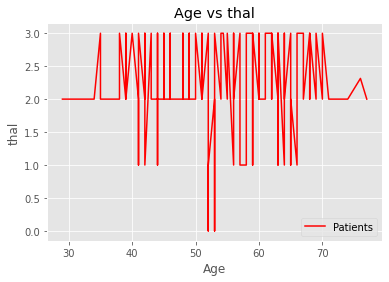

In [30]:
plt.title("Age vs thal")
plt.style.use('ggplot')
plt.xlabel("Age")
plt.ylabel("thal")
ko = df.sort_values(by=['age'])
plt.plot(ko.age,ko.thal,'r',label='Patients')
plt.legend(loc='lower right')
plt.show()

`Plotting datas of Patients with Heart disease and Healthy`

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


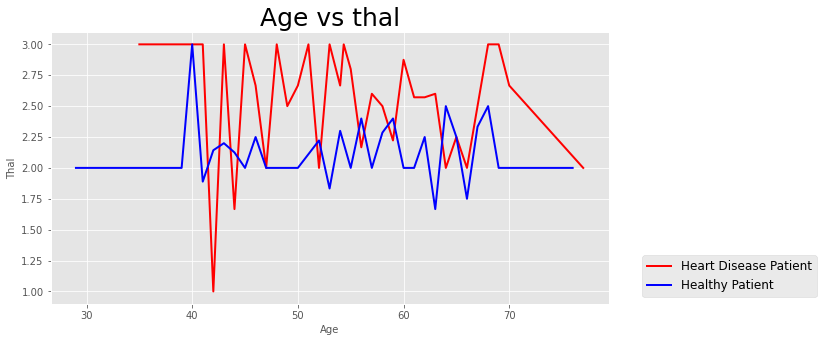

In [183]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.lineplot(df["age"],df["thal"],linewidth=2,hue = df['target'],ci=None,palette=['red','blue'])
plt.xlabel("Age",fontsize=10)
plt.ylabel("Thal",fontsize=10)
plt.title("Age vs thal",fontsize=25)
plt.legend(labels=['Heart Disease Patient','Healthy Patient'],frameon=True,fontsize='large',bbox_to_anchor=(1.05,0.2),loc=2)
plt.show()

###Sex vs Chest pain type

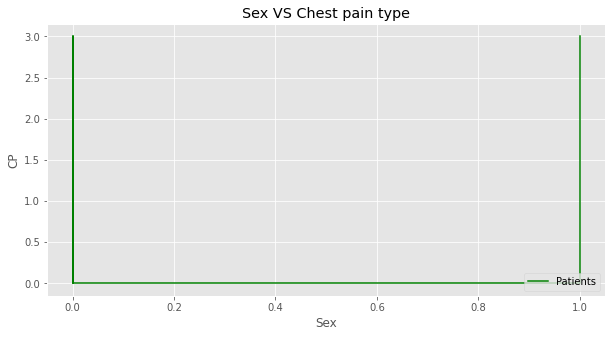

In [127]:
plt.figure(figsize=(10,5))
plt.title("Sex VS Chest pain type")
plt.style.use('ggplot')
plt.xlabel("Sex")
plt.ylabel("CP")
ko = df.sort_values(by=['sex'])
plt.plot(ko.sex,ko.cp,'g-',label='Patients')
plt.legend(loc='lower right') 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


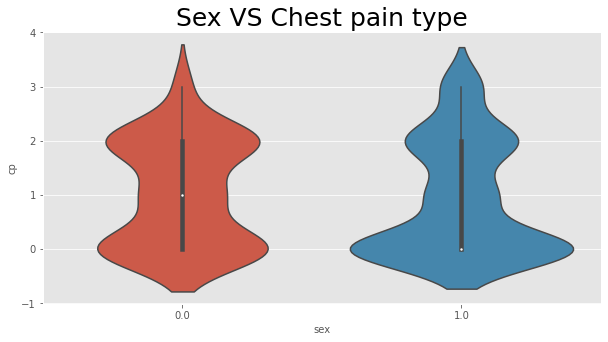

In [204]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
# sns.lineplot(df["sex"],df["cp"],linewidth=2,hue = df['target'],ci=None,palette=['red','blue'])
sns.violinplot(df.sex,df.cp)
plt.xlabel("sex",fontsize=10)
plt.ylabel("cp",fontsize=10)
plt.title("Sex VS Chest pain type",fontsize=25)
# plt.legend(labels=['Heart Disease','Healthy'],frameon=True,fontsize='large',bbox_to_anchor=(1.05,0.2),loc=2)
plt.show()

##10 Give your observations (or) inferences on the relationship between the features based on the line plots constructed in step-8.

**AGE VS CP :**

*   People wthin age range of 40 and 70 have most chest pain .   

*   Patients with Heart disease  have chest paintypes below 2 , whereas Healthy Patients have chest paintypes of above 1 .


**Chest pain type vs Serum cholestoral:**

*   Healthy Patients have low levels of Cholestrol   

*   Heart disease patients have comparatively high amounts of cholestrol in blood


**Age vs thal:**
A blood disorder called thalassemia : Lower levels represent normal and higher levels represented Fixed or reversable defect
People within age of 40 and 70 have more occurences of thalassemia.

*   Healthy Patients have low values of thalassemia representing normal condition   

*   Heart disease patients have  high values of thalassemia  in blood representing defect


**sex vs CP:**

Chest Pain types 0 and 2 have frequently occured than other chest pain types

*   Both Male and Female have equal Circumstances of Chest Pain 0

*   Chest Pain 2 is more likely to occur in Woman than Men
